#Tercer intento#



*   Solo con los datos de Madrid de Idealista2018
*   Madrid_Sale.csv y Madrid_Polygons.rda bajados de https://github.com/paezha/idealista18/tree/e2cfe3f621e1c37f226ce956f61b7306c42d5721/data


*   archivo Madrid_Polygons.rda transformado en csv con Notebook en R Script R rda a csv.ipyn https://colab.research.google.com/drive/1I06zwKUreseL1p87dHq0TzMheUHiEmVc


*   Exploración de datos (EDA) copiado de https://github.com/enricobonii/Idealista-Project/blob/main/IdealistaProject%20v4.ipynb
*Agregar la Columna neighbourhood a df_Madrid: de la latitud y longitud de cada casa se busca el barrio al que corresponde en Madrid_Polygons.csv

* la variable que vamos intentar predecir va a ser la diferencia en % entre el precio del piso y el precio medio por barrio - usaremos solo los datos del cuarto trimestre, quitando los que la diferencia sea mayor del 100%

* lo siguiente, Multivariate Analysis etc. copiado de https://github.com/enricobonii/Idealista-Project/blob/main/IdealistaProject%20v4.ipynb no se ha tocado de momento





In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Ruta al archivo CSV en Google Drive
file_path = '/content/drive/My Drive/Idealista_2024/datos_2018/'

Mounted at /content/drive


In [ ]:
from getpass import getpass
import os

# Solicita el token personal de GitHub
token = getpass('GitHub Token: ')

# Define la URL del repositorio y la ruta de clonación
repo_url = "https://github.com/edouardor/Idealista_2024.git"
destino = "/content/drive/MyDrive/Idealista_2024"

# Clona el repositorio en la carpeta de Google Drive
os.system(f'git clone https://{token}@github.com/edouardor/Idealista_2024.git {destino}')


GitHub Token: ··········


32768

In [ ]:
%cd /content/drive/MyDrive/Idealista_2024

/content/drive/MyDrive/Idealista_2024


In [ ]:
!ls -a


datos_2018  datos_2024	.git  .ipynb_checkpoints  Notebooks  README.md


In [ ]:
!git config --global user.email "edouardo@hotmail.es"
!git config --global user.name "edouardor"

In [ ]:
# Agregar los archivos modificados
!git add .

# Hacer un commit
!git commit -m "Actualización desde Google Colab"

# Hacer push de los cambios
!git push


[main cd179b9] Actualización desde Google Colab
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite Notebooks/Idealista Madrid github.ipynb (97%)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 134.88 KiB | 4.35 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/edouardor/Idealista_2024.git
   1e4b0b7..cd179b9  main -> main


**Para ver las diferencias con el notebook anterior:**

*descomentar las lineas siguientes*

In [ ]:
!pip install nbdime
!nbdiff Notebooks/"Idealista Madrid github.ipynb"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.9 MB/s eta 0:00:00
nbdiff Notebooks/Idealista Madrid github.ipynb (HEAD) Notebooks/Idealista Madrid github.ipynb
--- Notebooks/Idealista Madrid github.ipynb (HEAD)  (no timestamp)
+++ Notebooks/Idealista Madrid github.ipynb  2024-11-16 17:12:43
## replaced (type changed from NoneType to int) /cells/4/execution_count:
-  None
+  2

## added /cells/4/metadata/colab:
+  base_uri: https://localhost:8080/

## added /cells/4/metadata/executionInfo:
+  elapsed: 18212
+  status: ok
+  timestamp: 1731774536663
+  user:
+    displayName: Eduardo Ratier
+    userId: 13453298742051359948
+  user_tz: -60

## added /cells/4/metadata/outputId:
+  3b8e189a-a4a8-4e7b-c384-e59e0bc26c1f

## inserted before /cells/4/outputs/0:
+  output:
+    output_type: stream
+    name: stdout
+    text:
+      GitHub Token: ··········
+  output:
+    output_type: execute_result
+    ex

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import radians, cos, sin, asin, sqrt
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

pd.set_option('display.max_columns', None)

## Initializing Datasets

###Solo Madrid


In [ ]:

df= pd.read_csv(file_path+'gdf_Madrid_with_metro_count.csv')


In [ ]:
gdf = pd.read_csv(file_path+'Madrid_Polygons_with_mean_unitprice.csv')

*para poner luego los clusters definidos para cada barrio*

In [ ]:
df.head(3)

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_STREET,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION,neighbourhood,metros_within_500m
0,A2624736749193113090,4,166000,1844.444444,HOME,SALE,90,2,1,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,1.0,1986,10,32,5.0,0,0,1,7.953755,0.402011,6.504196,-3.611866,40.431013,Madrid,HOME,SALE,Hellín,2
1,A8841356095019025740,3,133000,1727.272727,HOME,SALE,77,3,1,1,1,1,3,0,0,1,1,0,0,0,0,0,0,0,0,0,3.0,1.0,1960,4,80,7.0,0,0,1,7.443821,0.480740,5.961369,-3.618239,40.431754,Madrid,HOME,SALE,Hellín,1
2,A6716251930495709236,3,98000,1719.298246,HOME,SALE,57,2,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1960,4,9,7.0,0,0,1,7.473113,0.287270,6.039694,-3.617411,40.430101,Madrid,HOME,SALE,Hellín,1


## Exploratory Data Analysis

In [ ]:
print(df.dtypes)

ASSETID                     object
PERIOD                       int64
PRICE                        int64
UNITPRICE                  float64
ADTYPOLOGYID                object
ADOPERATIONID               object
CONSTRUCTEDAREA              int64
ROOMNUMBER                   int64
BATHNUMBER                   int64
HASTERRACE                   int64
HASLIFT                      int64
HASAIRCONDITIONING           int64
AMENITYID                    int64
HASPARKINGSPACE              int64
HASNORTHORIENTATION          int64
HASSOUTHORIENTATION          int64
HASEASTORIENTATION           int64
HASWESTORIENTATION           int64
HASBOXROOM                   int64
HASWARDROBE                  int64
HASSWIMMINGPOOL              int64
HASDOORMAN                   int64
HASGARDEN                    int64
ISDUPLEX                     int64
ISSTUDIO                     int64
ISINTOPFLOOR                 int64
FLOORCLEAN                 float64
FLATLOCATIONID             float64
CADCONSTRUCTIONYEAR 

From here we can observe that the formatted variable types make sense with the expected and are homogeneous among the different datasets.

In [ ]:
df.describe(include='all')

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_STREET,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION,neighbourhood,metros_within_500m
count,75740,75740.000000,7.574000e+04,75740.000000,75740,75740,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740.000000,75740,75740,75740,75740,75740.000000
unique,75740,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,135,NaN
top,A2624736749193113090,NaN,NaN,NaN,HOME,SALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madrid,HOME,SALE,Lavapiés-Embajadores,NaN
freq,1,NaN,NaN,NaN,75740,75740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75740,75740,75740,2947,NaN
mean,NaN,2.784500,3.885028e+05,3632.521702,NaN,NaN,100.217586,2.570148,1.570240,0.351149,0.689213,0.439041,2.924835,0.216794,0.104383,0.231344,0.196343,0.142831,0.249908,0.563982,0.141907,0.247320,0.176657,0.025297,0.027079,0.021495,2.714840,0.871283,1965.446409,6.360536,38.695801,4.870399,0.031780,0.186903,0.781318,4.474552,0.469338,2.675121,-3.686323,40.420673,NaN,NaN,NaN,NaN,1.457182
std,NaN,1.209515,4.124885e+05,1708.417808,NaN,NaN,66.433670,1.246913,0.835428,0.477332,0.462819,0.496273,0.313232,0.412064,0.305759,0.421695,0.397233,0.349902,0.432962,0.495893,0.348957,0.431457,0.381381,0.157027,0.162316,0.145027,2.211571,0.334888,28.916426,2.843000,53.290795,1.460220,0.175414,0.389836,0.413355,2.669527,0.593230,2.199341,0.038916,0.033458,NaN,NaN,NaN,NaN,1.314439
min,NaN,1.000000,2.100000e+04,805.309734,NaN,NaN,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1623.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.007647,0.001416,0.001435,-3.832534,40.328682,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2.000000,1.570000e+05,2200.000000,NaN,NaN,62.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1955.000000,5.000000,12.000000,4.000000,0.000000,0.000000,1.000000,2.401815,0.212906,1.040583,-3.708313,40.396519,NaN,NaN,NaN,NaN,0.000000
50%,NaN,3.000000,2.560000e+05,3440.000000,NaN,NaN,82.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1967.000000,6.000000,21.000000,5.000000,0.000000,0.000000,1.000000,4.112561,0.329996,1.961970,-3.694002,40.423025,NaN,NaN,NaN,NaN,1.000000
75%,NaN,4.000000,4.560000e+05,4719.558389,NaN,NaN,115.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1983.000000,8.000000,39.000000,6.000000,0.000000,0.000

In [ ]:
# prompt: drop observertions where df[df['ROOMNUMBER']>20]

df = df[df['ROOMNUMBER'] <= 20]

In [ ]:
# dime cuales son los valores medios de UNITPRICE para cada periodo, y la diferencia en % con el primer periodo - con dos decimales es suficiente - pon tambien cuantos datos hay en df para cada periodo


# Group data by 'PERIOD' and calculate the mean of 'UNITPRICE'
mean_unitprice_by_period = df.groupby('PERIOD')['UNITPRICE'].agg(['mean', 'count'])

# Calculate the percentage difference from the first period
first_period_mean = mean_unitprice_by_period['mean'].iloc[0]
mean_unitprice_by_period['pct_change'] = ((mean_unitprice_by_period['mean'] - first_period_mean) / first_period_mean) * 100

# Format the output
mean_unitprice_by_period['pct_change'] = mean_unitprice_by_period['pct_change'].round(2)
mean_unitprice_by_period = mean_unitprice_by_period.rename(columns={'mean':'mean_unitprice', 'count':'n_datapoints'})

mean_unitprice_by_period

,mean_unitprice,n_datapoints,pct_change
PERIOD,,,
1,3478.870144,17603,0.00
2,3567.903365,12507,2.56
3,3646.436186,14234,4.82
4,3738.182770,31394,7.45


In [1]:
# vamos a usar solo los del 4º periodo, para evitar las diferencias de precio debido a la inflacíon
df = df[df['PERIOD'] == 4]

NameError: name 'df' is not defined

In [ ]:
# Agrupar por barrio y calcular el precio medio del m²
precio_medio_barrio = df.groupby('neighbourhood')['UNITPRICE'].mean().reset_index()

# Renombrar la columna para mayor claridad
precio_medio_barrio.rename(columns={'UNITPRICE': 'Precio_medio_m2'}, inplace=True)

print(precio_medio_barrio.head())

           neighbourhood  Precio_medio_m2
0  12 de Octubre-Orcasur      1855.416009
1               Abrantes      1956.641615
2                Acacias      4194.533621
3                Adelfas      4217.703417
4             Aeropuerto      1838.869115


In [ ]:
# prompt: quiero poner en el dataframe una columna con el precio medio del m2 de cada barrio

# Fusionar el DataFrame original con el DataFrame de precios medios por barrio
df = pd.merge(df, precio_medio_barrio, on='neighbourhood', how='left')


In [ ]:
# prompt: pon una columna con (UNITPRICE - Precio_medio_m2)/Precio_medio_m2

# Calculate the new column
df['diferencia_precio_m2'] = (df['UNITPRICE'] - df['Precio_medio_m2']) / df['Precio_medio_m2']

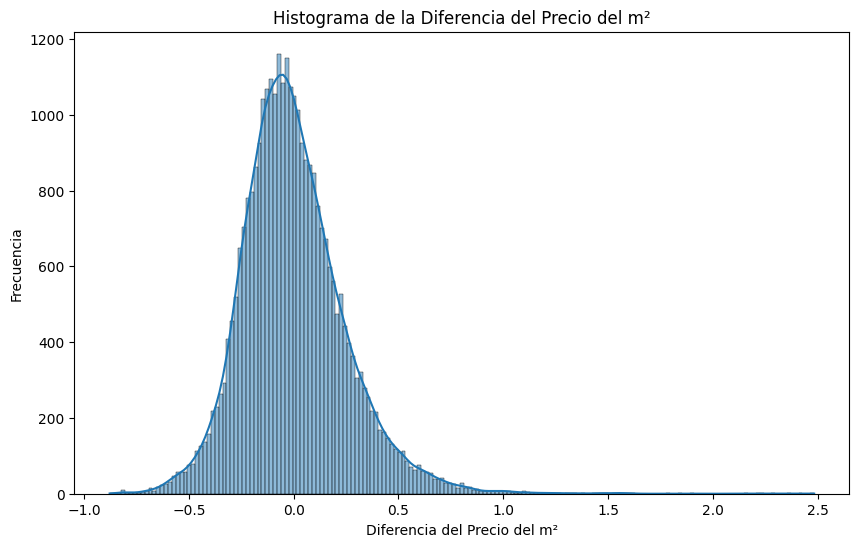

In [ ]:
# prompt: haz un histograma con esta columna

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has a column named 'diferencia_precio_m2'
plt.figure(figsize=(10, 6))
sns.histplot(df['diferencia_precio_m2'], kde=True)
plt.title('Histograma de la Diferencia del Precio del m²')
plt.xlabel('Diferencia del Precio del m²')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# prompt: cuenta los valores diferentes de las columnas 'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'AMENITYID',
#        'HASPARKINGSPACE','HASBOXROOM', 'HASWARDROBE',
#        'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO',
#        'ISINTOPFLOOR', 'FLOORCLEAN' , y dime cuantos hay de cada uno

# Define the columns to analyze
columns_to_analyze = ['AMENITYID']

# Loop through each column and count unique values
for column in columns_to_analyze:
  print(f"Column: {column}")
  value_counts = df[column].value_counts()
  print(value_counts)
  print("-" * 20)

Column: AMENITYID
AMENITYID
3    29430
2     1585
1      297
Name: count, dtype: int64
--------------------


In [ ]:
df.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'ADTYPOLOGYID',
       'ADOPERATIONID', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
       'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'AMENITYID',
       'HASPARKINGSPACE', 'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
       'HASEASTORIENTATION', 'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE',
       'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO',
       'ISINTOPFLOOR', 'FLOORCLEAN', 'FLATLOCATIONID', 'CADCONSTRUCTIONYEAR',
       'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT', 'CADASTRALQUALITYID',
       'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_STREET',
       'LONGITUDE', 'LATITUDE', 'CITYNAME', 'ADTYPOLOGY', 'ADOPERATION',
       'neighbourhood', 'metros_within_500m', 'Precio_medio_m2',
       'diferencia_precio_m2'],
      dtype='object')

In [ ]:

madrid = df.drop(columns=['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'ADTYPOLOGYID',
       'ADOPERATIONID','AMENITYID','HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
       'HASEASTORIENTATION', 'HASWESTORIENTATION','FLATLOCATIONID',
       'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT', 'CADASTRALQUALITYID','DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_STREET',
       'LONGITUDE', 'LATITUDE', 'CITYNAME', 'ADTYPOLOGY', 'ADOPERATION',
       'neighbourhood', 'metros_within_500m'])

In [ ]:
madrid.columns

Index(['CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE',
       'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO',
       'ISINTOPFLOOR', 'FLOORCLEAN', 'CADCONSTRUCTIONYEAR', 'BUILTTYPEID_1',
       'BUILTTYPEID_2', 'BUILTTYPEID_3', 'Precio_medio_m2',
       'diferencia_precio_m2'],
      dtype='object')

In [ ]:
madrid.CADCONSTRUCTIONYEAR = madrid.CADCONSTRUCTIONYEAR - 2018

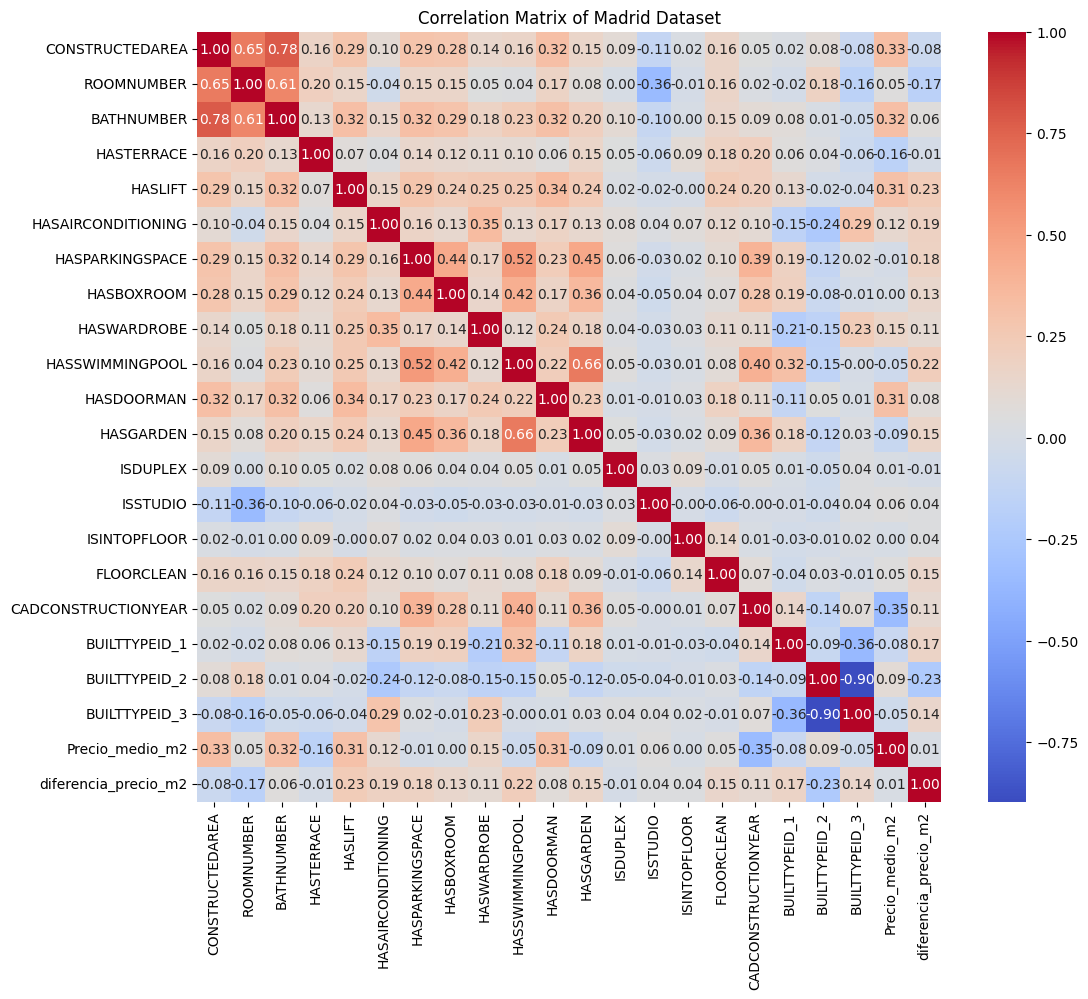

In [ ]:
# prompt: enseñame las correlaciones entre las variables

# Calculate the correlation matrix
correlation_matrix = madrid.corr()


# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Madrid Dataset')
plt.show()

Importar Librerías Necesarias:

## Multivariate Analysis

In [ ]:
print(madrid.dtypes)

CONSTRUCTEDAREA           int64
ROOMNUMBER                int64
BATHNUMBER                int64
HASTERRACE                int64
HASLIFT                   int64
HASAIRCONDITIONING        int64
HASPARKINGSPACE           int64
HASBOXROOM                int64
HASWARDROBE               int64
HASSWIMMINGPOOL           int64
HASDOORMAN                int64
HASGARDEN                 int64
ISDUPLEX                  int64
ISSTUDIO                  int64
ISINTOPFLOOR              int64
FLOORCLEAN              float64
CADCONSTRUCTIONYEAR       int64
BUILTTYPEID_1             int64
BUILTTYPEID_2             int64
BUILTTYPEID_3             int64
Precio_medio_m2         float64
diferencia_precio_m2    float64
dtype: object


In [ ]:
# print list of columns from correlation matrix in decreasing order of correlation with Price
correlation_matrix['diferencia_precio_m2'].sort_values(ascending=False)

,diferencia_precio_m2
diferencia_precio_m2,1.000000
HASLIFT,0.234642
HASSWIMMINGPOOL,0.215922
HASAIRCONDITIONING,0.188521
HASPARKINGSPACE,0.183182
BUILTTYPEID_1,0.165495
HASGARDEN,0.149985
FLOORCLEAN,0.146976
BUILTTYPEID_3,0.142596
HASBOXROOM,0.134425


As per the above table, in Madrid,, we can see that the columns CONSTRUCTEDAREA, BATHNUMBER, ROOMNUMBER, HASDOORMAN, HASLIFT, HASPARKINGSPACE, metro_within_500 m, FloorClean are some of the columns that have a higher correlation with the PRICE of the asset listed.

**Analysing the pricing of assets based on location**

## ML Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
import statsmodels.api as sm

X = madrid.drop(['diferencia_precio_m2'], axis=1)
y = madrid['diferencia_precio_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
y_train.shape

(25049,)

In [ ]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model_sm = sm.OLS(y_train, X_train_sm).fit()

y_pred = model_sm.predict(X_test_sm)

mae = mean_absolute_error(y_test, y_pred)
mdae = median_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MDAE: {mdae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

print(model_sm.summary())

MAE: 0.16087020635980379
MDAE: 0.1280996701182343
RMSE: 0.21157409716694156
MAPE: 313.33260370681825%
                             OLS Regression Results                             
Dep. Variable:     diferencia_precio_m2   R-squared:                       0.220
Model:                              OLS   Adj. R-squared:                  0.220
Method:                   Least Squares   F-statistic:                     353.6
Date:                  Sat, 16 Nov 2024   Prob (F-statistic):               0.00
Time:                          16:29:22   Log-Likelihood:                 3472.1
No. Observations:                 25049   AIC:                            -6902.
Df Residuals:                     25028   BIC:                            -6731.
Df Model:                            20                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


# 3. Entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 4. Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# 5. Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 0.21157409716694167


In [ ]:
unitprice_pred = (1 + y_pred)  * X_test['Precio_medio_m2']
price_pred = unitprice_pred * X_test['CONSTRUCTEDAREA']


In [ ]:
# Extraer índices del conjunto de prueba
indices_test = X_test.index

# Obtener los precios originales del conjunto de prueba
unitprice_test = df.loc[indices_test, 'UNITPRICE']

# Calcular los errores de predicción
mae = mean_absolute_error(unitprice_test, unitprice_pred)
print(f'MAE en m2: {mae}')

mse = mean_squared_error(unitprice_test, unitprice_pred)
print(f'MSE en m2: {mse}')

medae = median_absolute_error(unitprice_test, unitprice_pred)
print(f'Median AE en m2: {medae}')

MAE en m2: 605.0528017144082
MSE en m2: 733920.057471411
Median AE en m2: 436.7638492351625


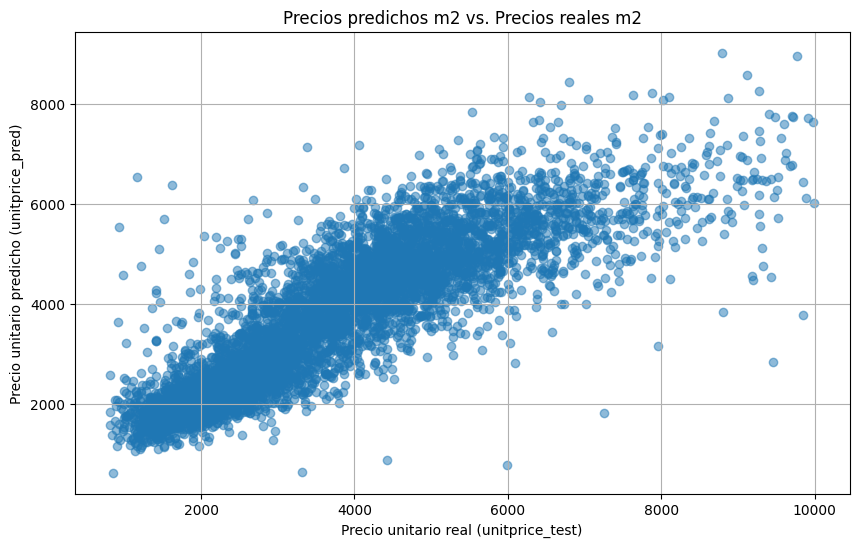

In [ ]:
# prompt: quiero dibujar precios_pred en función de unitprice_test

import matplotlib.pyplot as plt

# Assuming 'precios_pred' and 'unitprice_test' are already defined as in your provided code.

plt.figure(figsize=(10, 6))
plt.scatter(unitprice_test,unitprice_pred, alpha=0.5)  # Use alpha for better visualization if many points
plt.xlabel("Precio unitario real (unitprice_test)")
plt.ylabel("Precio unitario predicho (unitprice_pred)")
plt.title("Precios predichos m2 vs. Precios reales m2")
plt.grid(True)
plt.show()

In [ ]:
# Obtener los precios originales del conjunto de prueba
price_test = df.loc[indices_test, 'UNITPRICE'] * df.loc[indices_test, 'CONSTRUCTEDAREA']
price_pred = unitprice_pred * X_test['CONSTRUCTEDAREA']

# Calcular los errores de predicción
mae = mean_absolute_error(price_test, price_pred)
print(f'MAE: {mae}')

mse = mean_squared_error(price_test, price_pred)
print(f'MSE: {mse}')

medae = median_absolute_error(price_test, price_pred)
print(f'Median AE: {medae}')

# Calcular MAPE
mape = np.mean(np.abs((price_test- price_pred) / price_test)) * 100
print(f'MAPE en precio original: {mape}%')

MAE: 73852.47618434468
MSE: 37436876651.22555
Median AE: 34933.93904758984
MAPE en precio original: 17.629663832479146%


In [ ]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE en precio original: {mae}')

# Calcular MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'MAPE en precio original: {mape}%')


MAE en precio original: 64959.35576082519
MAPE en precio original: 16.960346021035505%


In [ ]:
from sklearn.model_selection import cross_val_score

# Calcular RMSE con validación cruzada
scores = cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.sqrt(-scores.mean())
print(f'RMSE CV en log(precio): {rmse_cv}')


RMSE CV en log(precio): 0.22049037477026226


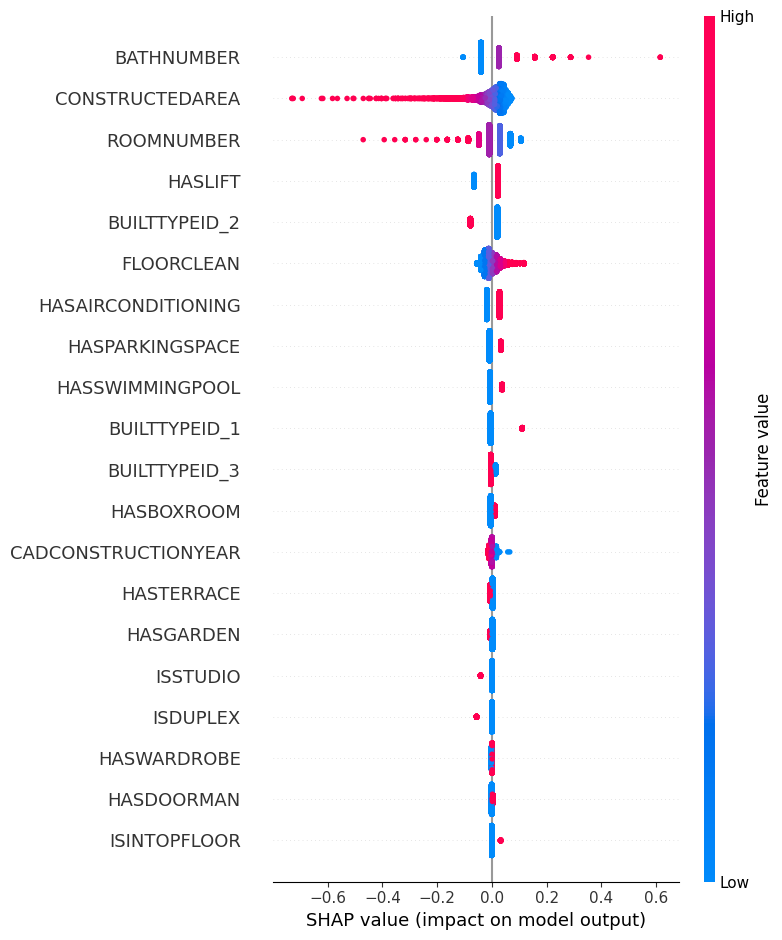

In [ ]:
import shap

# Crear un objeto explainer
explainer = shap.Explainer(modelo, X_train)
shap_values = explainer(X_test)

# Visualizar los valores SHAP
shap.summary_plot(shap_values, X_test)


*Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}*

Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAE: 0.14444562874066014
MDAE: 0.10358585942424448
RMSE: 0.2047934092678557
MAPE: 1.1560606875204664%
Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
                Feature  Importance
0        Log_Superficie    0.668474
15     Cluster_Ordenado    0.214294
13   DISTANCE_TO_STREET    0.023897
4               HASLIFT    0.022622
12    DISTANCE_TO_METRO    0.019452
11  CADCONSTRUCTIONYEAR    0.016108
2            BATHNUMBER    0.010915
1            ROOMNUMBER    0.005617
14   metros_within_500m    0.003909
5    HASAIRCONDITIONING    0.003824
6       HASSWIMMINGPOOL    0.003702
9       HASPARKINGSPACE    0.002768
3            HASTERRACE    0.002011
10            HASGARDEN    0.001326
8          ISINTOPFLOOR    0.000647
7              ISSTUDIO    0.000434


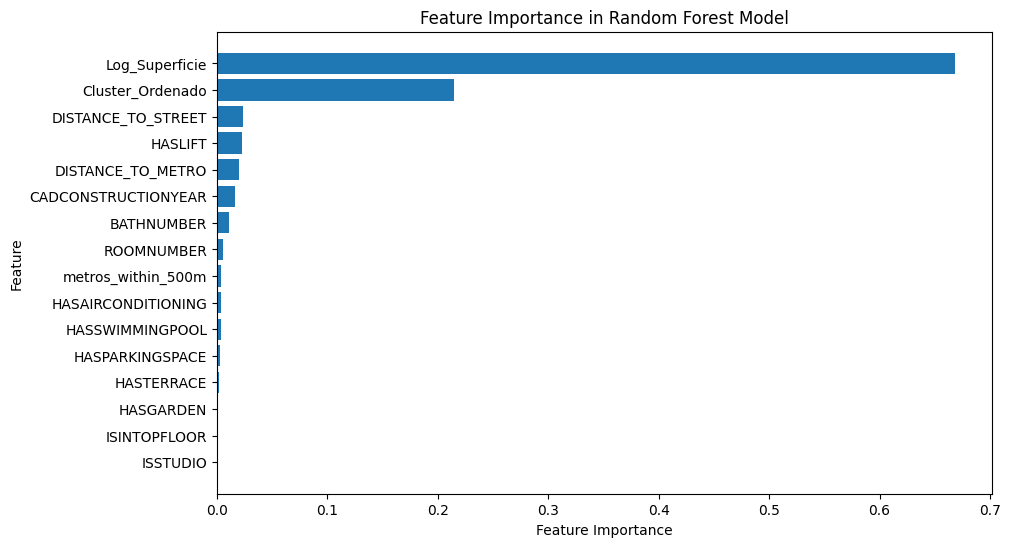

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
#import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [300], #[100, 200, 300]
    'max_depth': [None], #[10, 20, None]
    'min_samples_split': [2], #[2, 5, 10]
    'min_samples_leaf': [1], #[1, 2, 4]
    'bootstrap': [True] #[True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_log = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_log)
mdae = median_absolute_error(y_test, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))
mape = np.mean(np.abs((y_test - y_pred_log) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MDAE: {mdae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

print(f'Best parameters found: {grid_search.best_params_}')

feature_importances = best_rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Convertir predicciones logarítmicas a precios originales
y_pred = np.exp(y_pred_log)

# Convertir valores reales logarítmicos a precios originales
y_true = np.exp(y_test)

# Calcular RMSE en la escala original
rmse_original = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE en precio original: {rmse_original}')



RMSE en precio original: 114970.60747677916


In [ ]:
# Calcular MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE en precio original: {mae}')

# Calcular MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'MAPE en precio original: {mape}%')

MAE en precio original: 58272.48349981926
MAPE en precio original: 15.12677647407458%


*Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 1.0}*


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [300], #[100, 200, 300],
    'max_depth': [10],#[3, 5, 7, 10],
    'learning_rate': [0.05], #[0.01, 0.05, 0.1, 0.2],
    'subsample': [1], #[0.6, 0.8, 1.0],
    'colsample_bytree':[0.6], #[0.6, 0.8, 1.0],
    'reg_alpha': [0.1], #[0, 0.1, 0.5, 1],
    'reg_lambda': [0] #[0, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

y_pred_log = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_log)
mdae = median_absolute_error(y_test, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_log))
mape = np.mean(np.abs((y_test - y_pred_log) / y_test)) * 100

print(f'MAE: {mae}')
print(f'MDAE: {mdae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

#Convertir predicciones logarítmicas a precios originales
y_pred = np.exp(y_pred_log)

# Convertir valores reales logarítmicos a precios originales
y_true = np.exp(y_test)

# Calcular RMSE en la escala original
rmse_original = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE en precio original: {rmse_original}')

# Calcular MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE en precio original: {mae}')

# Calcular MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'MAPE en precio original: {mape}%')

print(f'Best parameters found: {grid_search.best_params_}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
MAE: 0.13695258936614077
MDAE: 0.10204509554911212
RMSE: 0.18805068017067247
MAPE: 1.0920569204751316%
RMSE en precio original: 97727.78940842774
MAE en precio original: 52927.03363930283
MAPE en precio original: 13.874653106144763%
Best parameters found: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 1}


In [ ]:
from sklearn.model_selection import cross_val_score

modelo = XGBRegressor(random_state=42, **grid_search.best_params_)
scores = cross_val_score(modelo, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.sqrt(-scores.mean())
print(f'RMSE CV en log(precio): {rmse_cv}')


RMSE CV en log(precio): 0.18715205867103274


In [ ]:
# Solo si deseas verificar (no recomendado para evaluar rendimiento)
y_pred_all_log = best_xgb.predict(X)
y_pred_all = np.exp(y_pred_all_log)
y_true_all = np.exp(y)

mape_all = np.mean(np.abs((y_true_all - y_pred_all) / y_true_all)) * 100
print(f'MAPE en todo el conjunto: {mape_all}%')


MAPE en todo el conjunto: 8.617381155881192%


In [ ]:
# Suponiendo que 'df_Madrid' ya contiene la columna 'Cluster_Ordenado'

# Definir los grupos basados en 'Cluster_Ordenado'
def asignar_grupo(cluster):
    if cluster <= 6:
        return 'Normal'
    else:
        return 'De Lujo'

df_Madrid_abridged['Grupo'] = df_Madrid_abridged['Cluster_Ordenado'].apply(asignar_grupo)

# Verificar la distribución de los grupos
print(df_Madrid_abridged['Grupo'].value_counts())


Grupo
Normal    31394
Name: count, dtype: int64


In [ ]:
PRICE_pred_log = best_xgb.predict(X)

In [ ]:
PRICE_pred = np.exp(PRICE_pred_log)

In [ ]:
df_Madrid_abridged['PRICE_pred'] = PRICE_pred

In [ ]:
# Suponiendo que 'df_Madrid' tiene las siguientes columnas:
# - 'Precio_m2': Precio real.
# - 'Precio_Predicho': Precio predicho por el modelo.

# Asegúrate de tener las predicciones en la escala original
# Si tienes predicciones en log, conviértelas:
# df_Madrid['Precio_Predicho'] = np.exp(df_Madrid['Log_Precio_Predicho'])

# Calcular el MAPE para cada piso
df_Madrid_abridged['MAPE'] = np.abs((df_Madrid_abridged['PRICE'] - df_Madrid_abridged['PRICE_pred']) / df_Madrid_abridged['PRICE']) * 100

# Verificar algunos valores
print(df_Madrid_abridged[['PRICE', 'PRICE_pred', 'MAPE']].head())


     PRICE     PRICE_pred       MAPE
0   166000  176642.375000   6.411069
3   125000  117490.101562   6.007919
13   96000   88075.031250   8.255176
18  301000  287353.406250   4.533752
19   90000  102462.234375  13.846927


In [ ]:
# Calcular el MAPE medio por Cluster Geográfico
mape_por_cluster_geografico = df_Madrid_abridged.groupby('Cluster_Geografico')['MAPE'].mean().reset_index()

print(mape_por_cluster_geografico)


   Cluster_Geografico      MAPE
0                   0  9.290466
1                   1  8.941783
2                   2  8.399518
3                   3  7.846164
4                   4  8.308608
5                   5  7.839241
6                   6  8.212691
7                   7  8.791329
8                   8  8.203398


In [ ]:
# Calcular el MAPE medio por Cluster Ordenado
mape_por_cluster_ordenado = df_Madrid_abridged.groupby('Cluster_Ordenado')['MAPE'].mean().reset_index()

print(mape_por_cluster_ordenado)

   Cluster_Ordenado      MAPE
0                 0  8.980637
1                 1  8.922337
2                 2  8.302031
3                 3  8.378580
4                 4  8.547853
5                 5  8.357779
